# Trabajo Final - Predecir si una persona posee Síndrome Metabólico

## Sección 1 - Motivación y Audiencia

### *Motivación*
El síndrome metabólico es un conjunto de afecciones médicas que incluyen obesidad abdominal, niveles elevados de azúcar en la sangre, presión arterial alta, niveles elevados de triglicéridos y niveles bajos de colesterol HDL ("buen" colesterol). Estas afecciones están relacionadas con un mayor riesgo de enfermedad cardiovascular, diabetes tipo 2 y otros problemas de salud.  
El tratamiento del síndrome metabólico generalmente implica cambios en el estilo de vida, como la pérdida de peso, el aumento de la actividad física y la adopción de una dieta saludable. En algunos casos, se pueden recetar medicamentos para tratar los diferentes componentes del síndrome metabólico. El tratamiento temprano y efectivo del síndrome metabólico puede ayudar a prevenir complicaciones graves de salud en el futuro.

### *Audiencia*
El síndrome metabólico puede afectar a personas de todas las edades, pero es más común en personas mayores y en aquellos que tienen antecedentes familiares de la afección. Además, hay varios factores de riesgo que pueden aumentar la probabilidad de desarrollar el síndrome metabólico, entre ellos:
- Obesidad abdominal: Las personas con un exceso de grasa alrededor del abdomen tienen un mayor riesgo de desarrollar el síndrome metabólico.
- Edad: El riesgo de síndrome metabólico aumenta a medida que las personas envejecen.
- Historial familiar: Si hay antecedentes familiares de síndrome metabólico o enfermedad cardiovascular, el riesgo de desarrollar la afección es mayor.
- Inactividad física: La falta de actividad física regular puede aumentar el riesgo de síndrome metabólico.
- Alimentación poco saludable: Una dieta rica en alimentos procesados, grasas saturadas, carbohidratos refinados y azúcar puede aumentar el riesgo de síndrome metabólico.
- Diabetes o resistencia a la insulina: Las personas con diabetes tipo 2 o resistencia a la insulina tienen un mayor riesgo de desarrollar el síndrome metabólico.
- Hipertensión arterial: Las personas con presión arterial alta tienen un mayor riesgo de desarrollar el síndrome metabólico.

## Sección 2 - Preguntas de Interés

### *Preguntas Generales*
- ¿Qué varaibles poseen alto grado de correlación?
- ¿Existen variables que posean dependencia entre si por su naturaleza?
- ¿Influye la raza del individuo que aumente la probalidad de poseer Síndrome Metabólico?
- ¿La edad es una variable indispensable para predecir el estado unaa persona con referencia al Sindrome Metabólico?

### *Pregunta Objetivo*
Utilizando todas las variables que aparecen en el conjunto de datos: **¿Se pretende determinar la influencia de cada una de ellas en la identificación precisa de si una persona padece o no del síndrome metabólico?**

## Sección 3 - Data Acquisition

El conjunto de datos para el análisis provino de la iniciativa NHANES (National Center for Health Statistics). Ha sido descargado del sitio data.world el cual posee una gran variedad de datasets y otros contenidos. Se puede acceder al dataset en este [Enlace](https://data.world/informatics-edu/metabolic-syndrome-prediction).

La descripción del dataset se muestra a continuación:  
* **seqn** : ID de registro
* **Age** : Edad del paciente.
* **Sex** : Sexo del paciente.
* **Marital** : Estado civil del paciente.
* **Income** : Ingresos mensuales del paciente.
* **Race** : Etnia del paciente.
* **WaistCirc** : Circunferencia de la cintura del paciente.
* **BMI** : IMC (Índice de Masa Corporal) del paciente.
* **Albuminuria** : Estado de albuminuria del paciente.
* **UrAlbCr** : Relación albúmina-creatinina en orina del paciente.
* **UricAcid** : Nivel de ácido úrico del paciente.
* **BloodGlucose** : Nivel de glucosa en sangre del paciente.
* **HDL** : Nivel de HDL (lipoproteína de alta densidad) del paciente.
* **Triglycerides** : Nivel de triglicéridos del paciente.
* **MetabolicSyndrome** : Si el paciente padece síndrome metabólico o no. 

### Importación de librerías

In [191]:
# Tratamiento de datos
# ==============================================================================
import numpy as np                    # Importar Numpy
import pandas as pd                   # Importar Pandas

# Gráficos
# ==============================================================================
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt       # El modulo Pyplot de Matplotlib
import seaborn as sns                 # Importar Seaborn
import plotly.express as px

mpl.style.use('bmh')    # Establecemos un nuevo estilo

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [192]:
df = pd.read_csv("sindrome_metabolico.csv")
filas=df.shape[0]
columnas=df.shape[1]
print("Cantidad de filas: {}".format(filas))
print("Cantidad de columnas: {}".format(columnas))
df.head()

Cantidad de filas: 2401
Cantidad de columnas: 15


seqn  Age     Sex  Marital  Income   Race  WaistCirc   BMI  Albuminuria  \
0  62161   22    Male   Single  8200.0  White       81.0  23.3            0   
1  62164   44  Female  Married  4500.0  White       80.1  23.2            0   
2  62169   21    Male   Single   800.0  Asian       69.6  20.1            0   
3  62172   43  Female   Single  2000.0  Black      120.4  33.3            0   
4  62177   51    Male  Married     NaN  Asian       81.1  20.1            0   

   UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides MetabolicSyndrome  
0     3.88       4.9            92   41             84         No MetSyn  
1     8.55       4.5            82   28             56         No MetSyn  
2     5.07       5.4           107   43             78         No MetSyn  
3     5.22       5.0           104   73            141         No MetSyn  
4     8.13       5.0            95   43            126         No MetSyn

## Sección 4 - EDA (Análisis univariado, bivariado y multivariado)

In [193]:
#Tabla resumen de los campos del dataframe

caracteristicas = pd.DataFrame(columns=["TipoDato","Vacios-Nulos","ValoresUnicos"])
caracteristicas["TipoDato"] = df.dtypes.values
caracteristicas["Vacios-Nulos"] = df.isna().sum().values
caracteristicas.index=df.columns
for i in df.columns:
    unicos =len(df[i].dropna().unique())
    caracteristicas["ValoresUnicos"].loc[i]=unicos

caracteristicas

TipoDato  Vacios-Nulos ValoresUnicos
seqn                 int64             0          2401
Age                  int64             0            61
Sex                 object             0             2
Marital             object           208             5
Income             float64           117            14
Race                object             0             6
WaistCirc          float64            85           635
BMI                float64            26           322
Albuminuria          int64             0             3
UrAlbCr            float64             0          1383
UricAcid           float64             0            88
BloodGlucose         int64             0           187
HDL                  int64             0            93
Triglycerides        int64             0           345
MetabolicSyndrome   object             0             2

In [194]:
#Eliminar los valores vacios
df=df.dropna()
print("Cantidad de filas nuladas: {}".format(filas-df.shape[0]))
print("Porcentaje de filas anuladas: {:.2f}%".format((1-df.shape[0]/filas)*100))


Cantidad de filas nuladas: 392
Porcentaje de filas anuladas: 16.33%


**NOTA**: Debido a que existen datos NaN, por ahora se han eliminado, posteriormente se puede completar usando un modelo de clasificación y regresión para cada tipo de variable, así se podrá observar si la efectividad del algoritmo ML mejora. 

In [195]:
#Filas duplicadas
df.duplicated().any()

False

### Estadística Descriptiva

In [196]:
df.describe().round(2).T

count      mean      std      min       25%       50%  \
seqn           2009.0  67065.71  2800.74  62161.0  64682.00  67143.00   
Age            2009.0     49.26    17.42     20.0     35.00     49.00   
Income         2009.0   4147.19  2984.60    300.0   1600.00   3500.00   
WaistCirc      2009.0     98.52    16.31     63.1     86.90     97.10   
BMI            2009.0     28.73     6.58     15.7     24.10     27.70   
Albuminuria    2009.0      0.15     0.42      0.0      0.00      0.00   
UrAlbCr        2009.0     42.25   241.42      1.4      4.46      6.96   
UricAcid       2009.0      5.49     1.43      1.8      4.50      5.40   
BloodGlucose   2009.0    108.01    33.64     39.0     92.00    100.00   
HDL            2009.0     53.55    15.01     14.0     43.00     51.00   
Triglycerides  2009.0    126.89    89.82     26.0     75.00    103.00   

                    75%       max  
seqn           69488.00  71915.00  
Age               63.00     80.00  
Income          6200.00   9000.00  
WaistCirc        107.80    170.50  
BMI               32.10     68.70  
Albuminuria        0.00      2.00  
UrAlbCr           13.49   4462.81  
UricAcid           6.40     11.30  
BloodGlucose     110.00    382.00  
HDL               62.00    150.00  
Triglycerides    149.00   1311.00

### Análisis Univariado

In [197]:
#Variables categóricas y numéricas
var_num = ["Age","Income","WaistCirc","BMI","Albuminuria","UrAlbCr","UricAcid","BloodGlucose","HDL","Triglycerides"]
var_cat = ["Sex","Marital","Race","MetabolicSyndrome"]

In [198]:
for i in var_cat:
    print(i,":",df[i].unique())

Sex : ['Male' 'Female']
Marital : ['Single' 'Married' 'Widowed' 'Separated' 'Divorced']
Race : ['White' 'Asian' 'Black' 'MexAmerican' 'Hispanic' 'Other']
MetabolicSyndrome : ['No MetSyn' 'MetSyn']


Análisis para variables numéricas

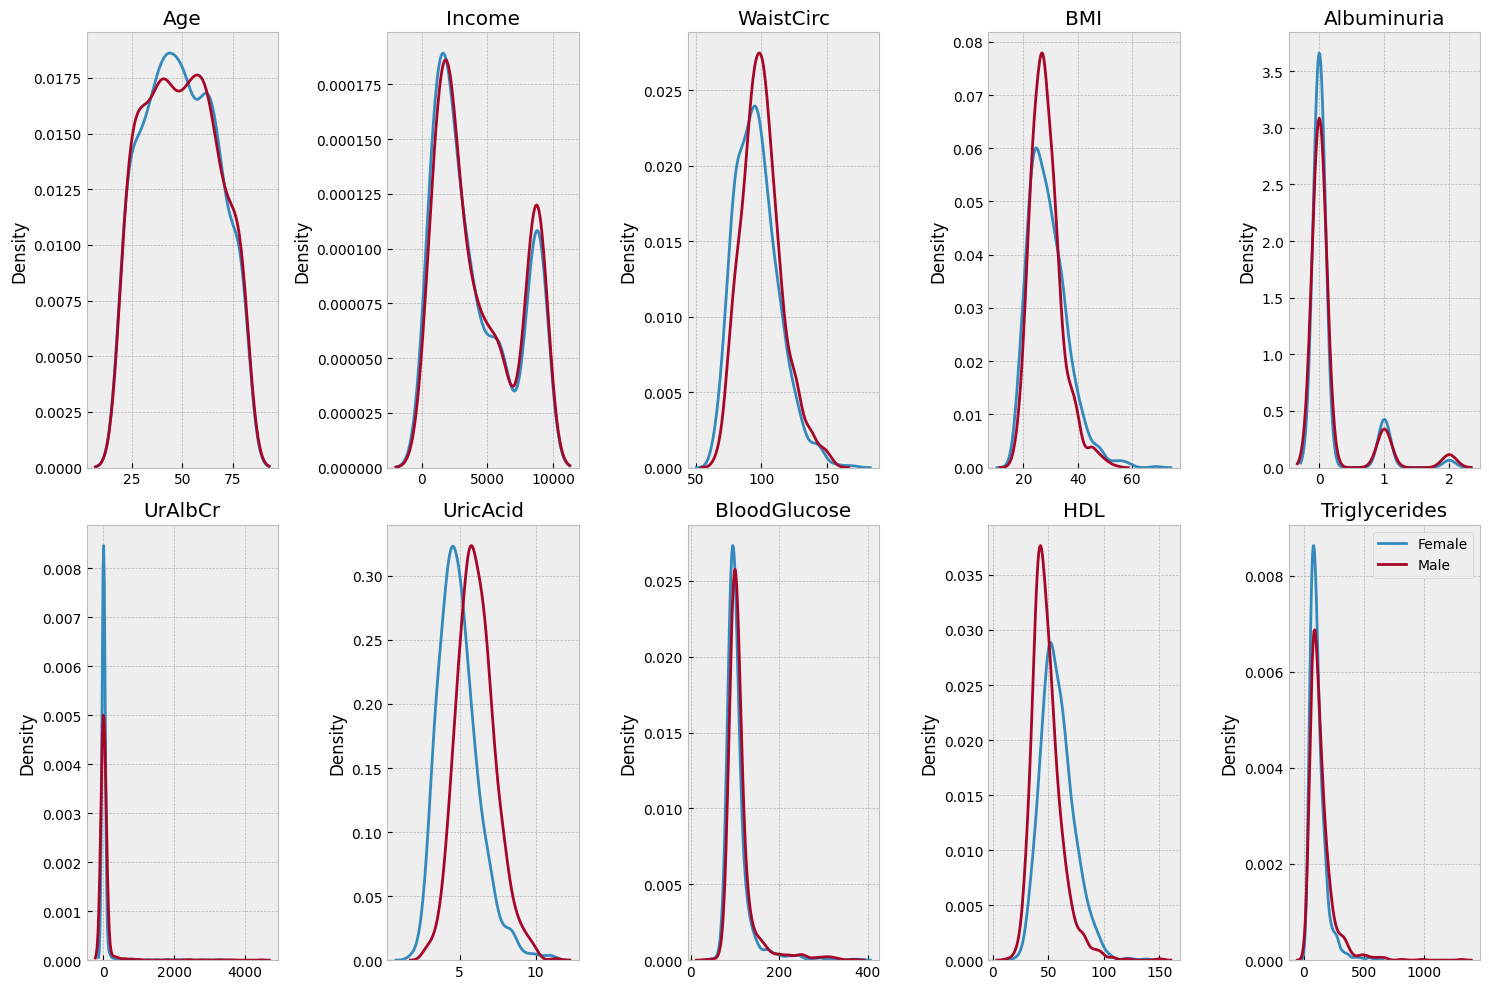

In [199]:
#Análisis para género
fig,axs = plt.subplots(2,5,figsize=(15,10))

F = df[df['Sex']=='Female']
M = df[df['Sex']=='Male']

for index,variable in enumerate(var_num):
    f=index//5
    c=index%5
    sns.distplot(F[variable],label='Female',ax=axs[f,c],hist=False)
    sns.distplot(M[variable],label='Male',ax=axs[f,c],hist=False)
    axs[f,c].set_title(variable)
    axs[f,c].set_xlabel("")
      
plt.tight_layout()
plt.legend()
plt.show()

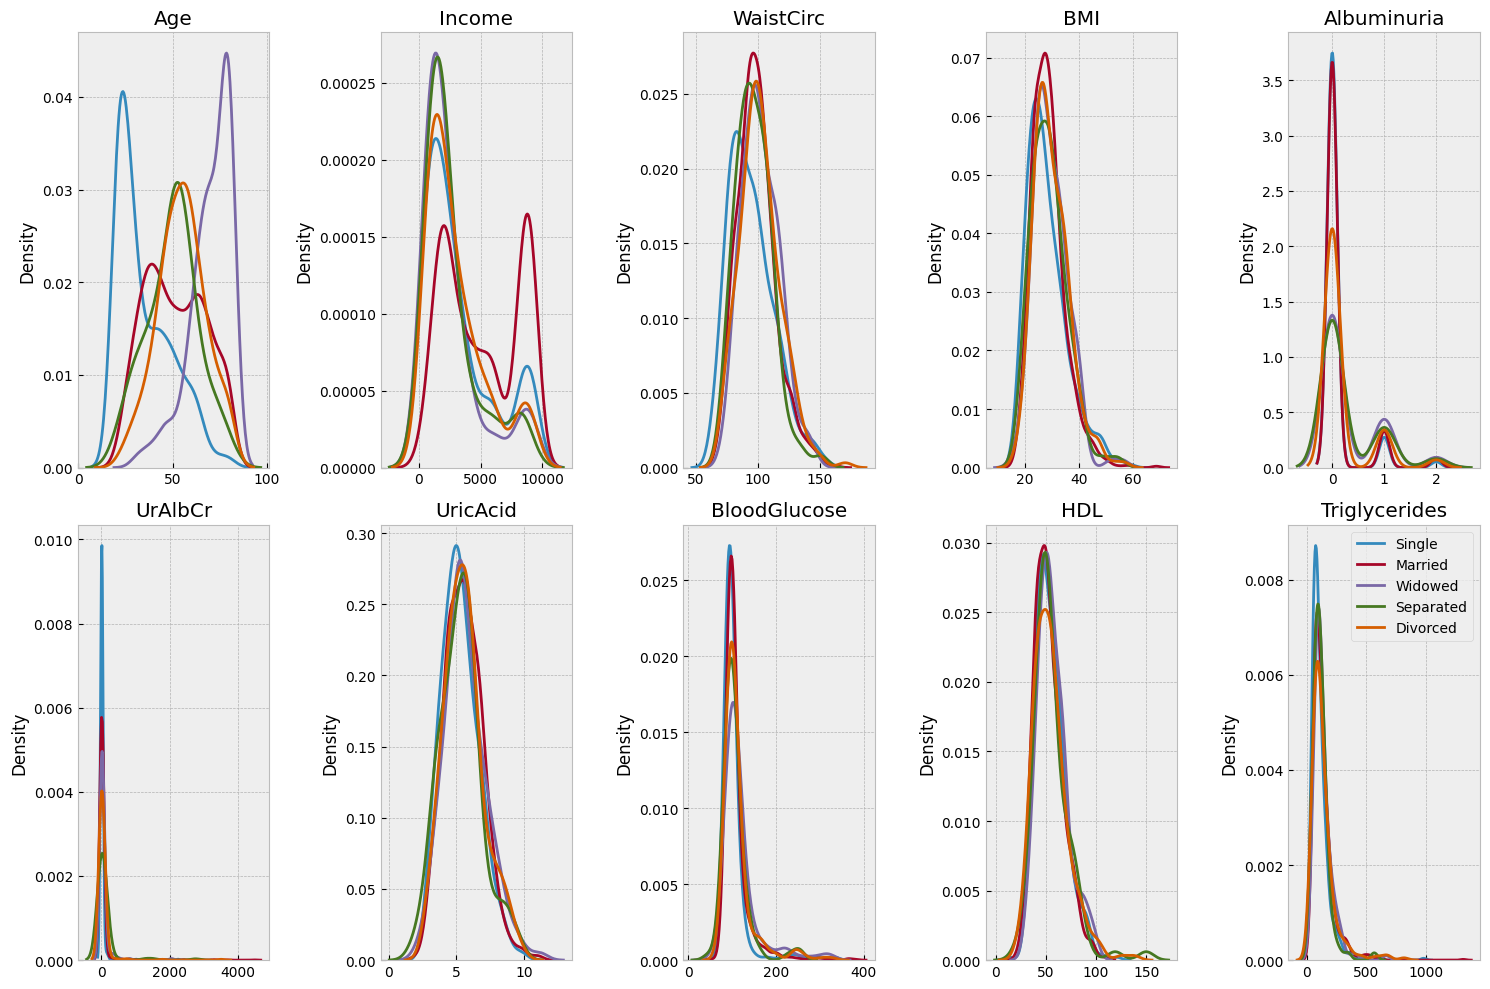

In [200]:
#Análisis para estado civil
fig,axs = plt.subplots(2,5,figsize=(15,10))

SI = df[df['Marital']=='Single']
MA = df[df['Marital']=='Married']
WI = df[df['Marital']=='Widowed']
SE = df[df['Marital']=='Separated']
DI = df[df['Marital']=='Divorced']

for index,variable in enumerate(var_num):
    f=index//5
    c=index%5
    sns.distplot(SI[variable],label='Single',ax=axs[f,c],hist=False)
    sns.distplot(MA[variable],label='Married',ax=axs[f,c],hist=False)
    sns.distplot(WI[variable],label='Widowed',ax=axs[f,c],hist=False)
    sns.distplot(SE[variable],label='Separated',ax=axs[f,c],hist=False)
    sns.distplot(DI[variable],label='Divorced',ax=axs[f,c],hist=False)
    axs[f,c].set_title(variable)
    axs[f,c].set_xlabel("")
      
plt.tight_layout()
plt.legend()
plt.show()


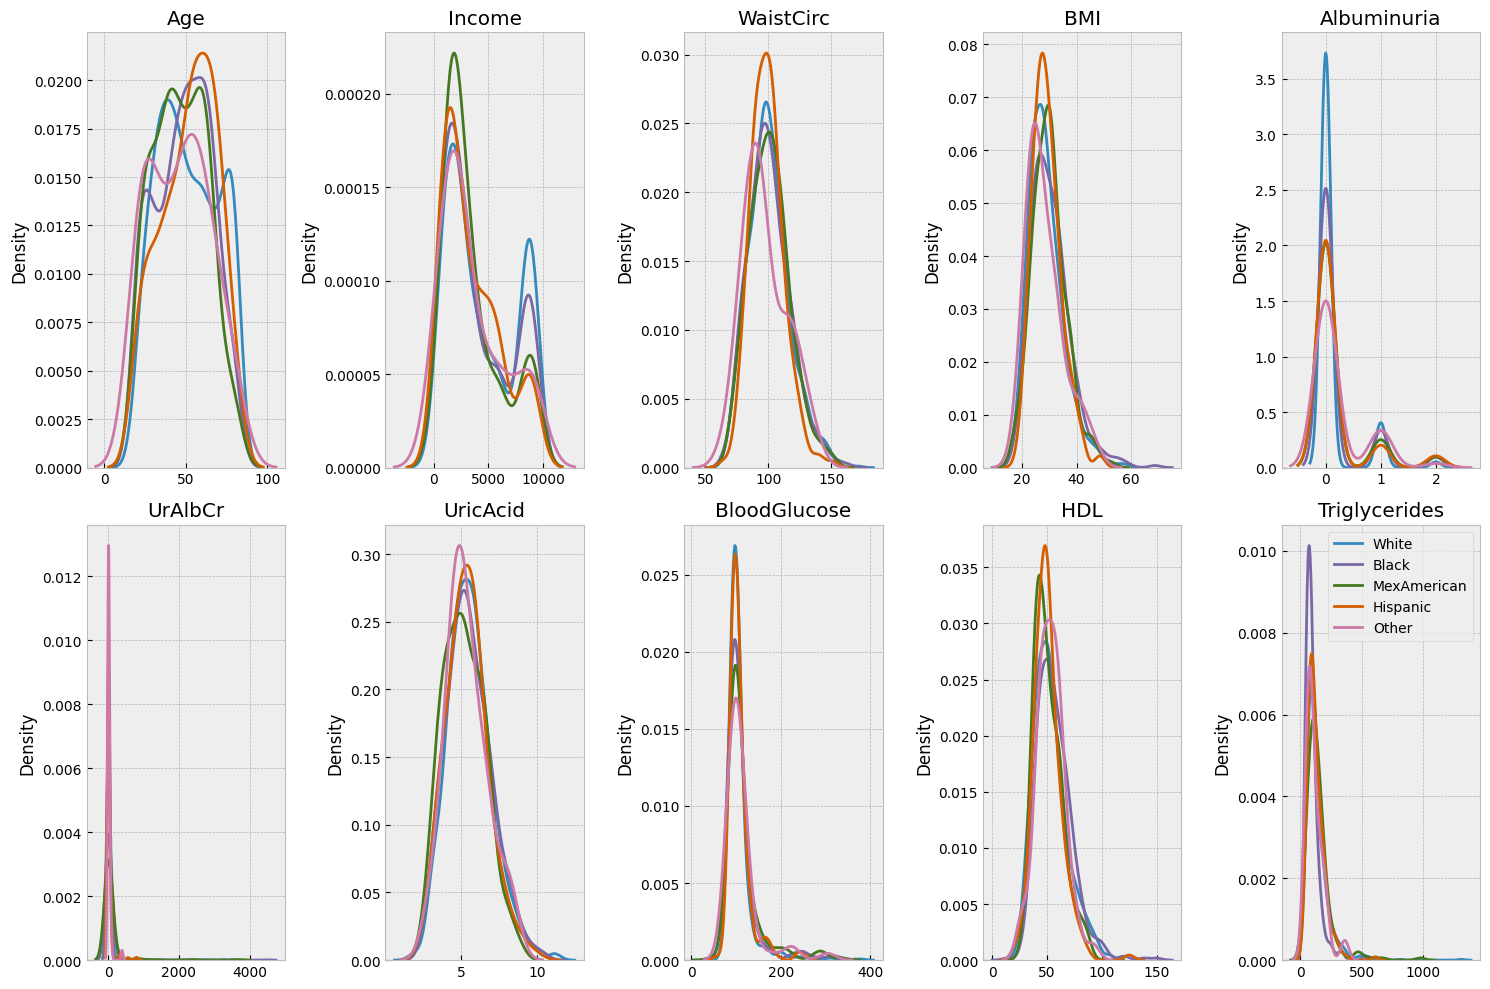

In [201]:
#Análisis para raza
fig,axs = plt.subplots(2,5,figsize=(15,10))

W = df[df['Race']=='White']
A = df[df['Race']=='Male']
B = df[df['Race']=='Black']
M = df[df['Race']=='MexAmerican']
H = df[df['Race']=='Hispanic']
O = df[df['Race']=='Other']

for index,variable in enumerate(var_num):
    f=index//5
    c=index%5
    sns.distplot(W[variable],label='White',ax=axs[f,c],hist=False)
    sns.distplot(A[variable],label='Male',ax=axs[f,c],hist=False)
    sns.distplot(B[variable],label='Black',ax=axs[f,c],hist=False)
    sns.distplot(M[variable],label='MexAmerican',ax=axs[f,c],hist=False)
    sns.distplot(H[variable],label='Hispanic',ax=axs[f,c],hist=False)
    sns.distplot(O[variable],label='Other',ax=axs[f,c],hist=False)
    axs[f,c].set_title(variable)
    axs[f,c].set_xlabel("")
      
plt.tight_layout()
plt.legend()
plt.show()

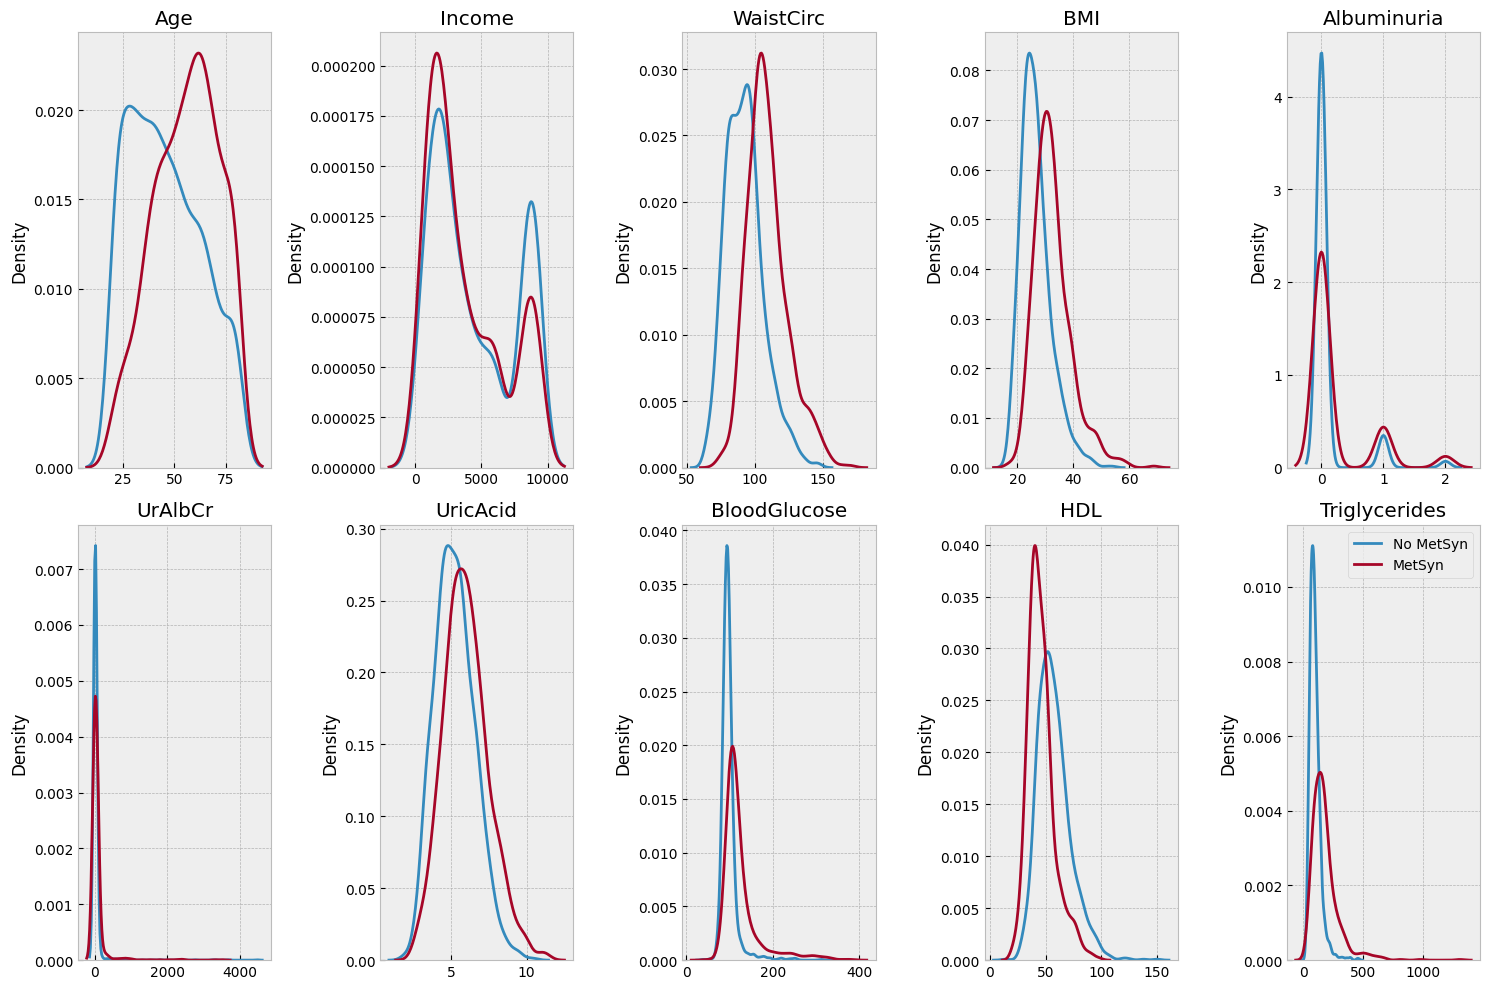

In [202]:
#Análisis para Síndrome Metabólico
fig,axs = plt.subplots(2,5,figsize=(15,10))

N = df[df['MetabolicSyndrome']=='No MetSyn']
Y = df[df['MetabolicSyndrome']=='MetSyn']

for index,variable in enumerate(var_num):
    f=index//5
    c=index%5
    sns.distplot(N[variable],label='No MetSyn',ax=axs[f,c],hist=False)
    sns.distplot(Y[variable],label='MetSyn',ax=axs[f,c],hist=False)
    axs[f,c].set_title(variable)
    axs[f,c].set_xlabel("")
      
plt.tight_layout()
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


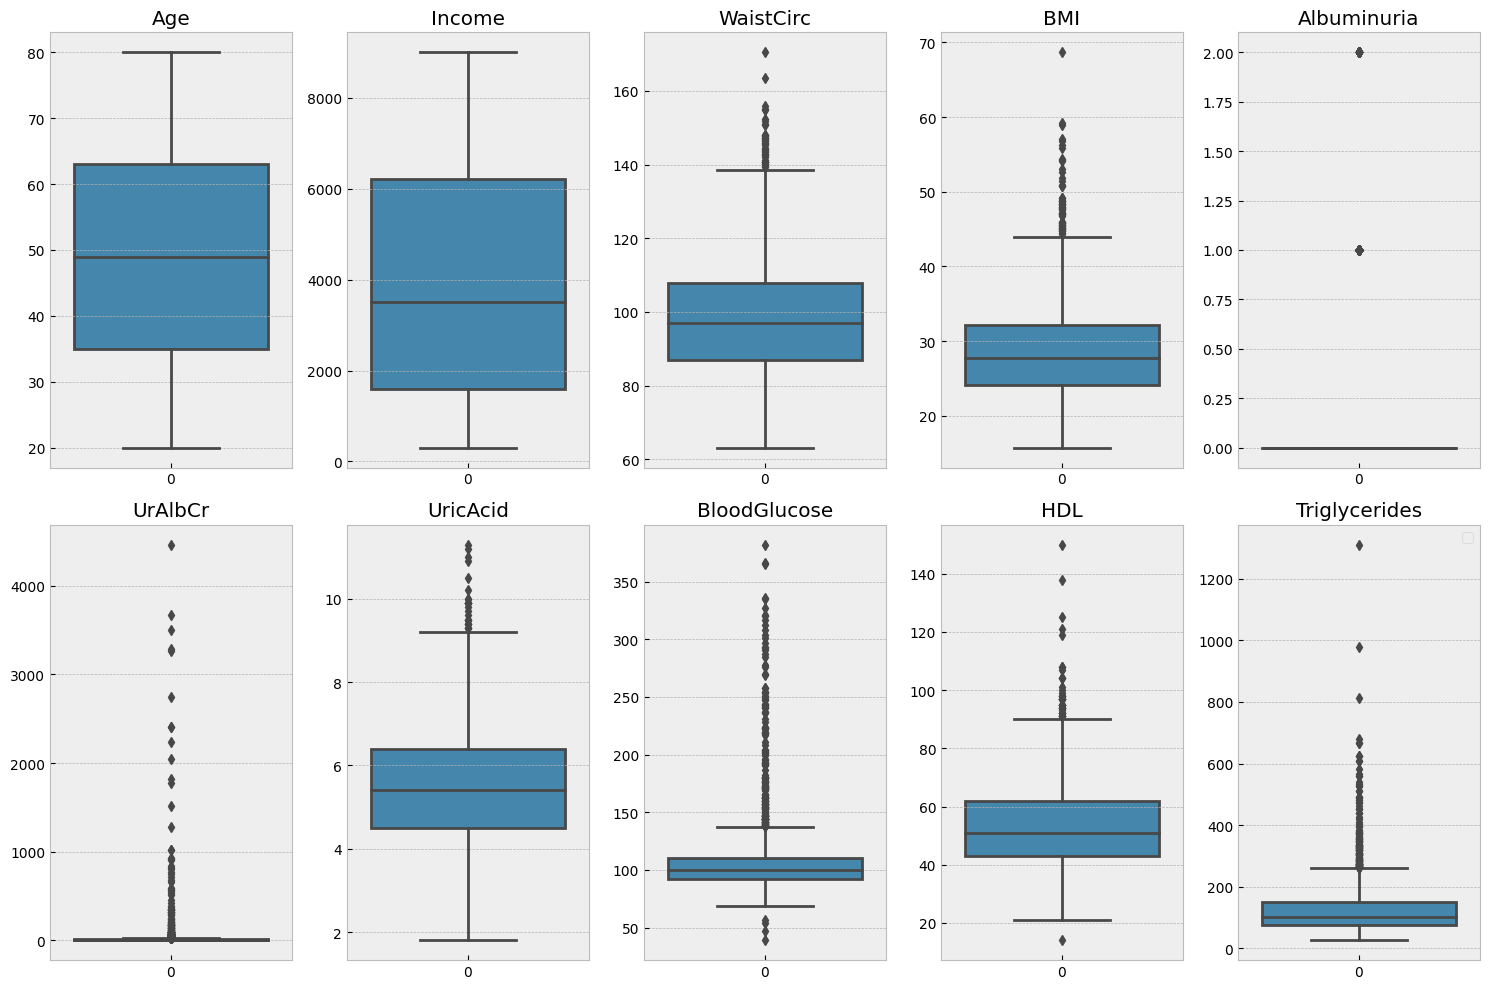

In [203]:
#Análisis para Cada Variable Numérica
fig,axs = plt.subplots(2,5,figsize=(15,10))

for index,variable in enumerate(var_num):
    f=index//5
    c=index%5
    sns.boxplot(data=df[variable],ax=axs[f,c])
    axs[f,c].set_title(variable)
    axs[f,c].set_xlabel("")
      
plt.tight_layout()
plt.legend()
plt.show()

**Análisis de distribución cada varibale categórica**

In [204]:
#var_cat = ["Sex","Marital","Race","MetabolicSyndrome"]
def dist(data_column):
    conteo = data_column.value_counts()
    data = pd.DataFrame(conteo)
    import plotly.express as px
    fig = px.pie(data, values=data.columns.values[0],names=data.index,width=500, height=500)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

In [205]:
#Análisis para Sexo
dist(df["Sex"])

In [206]:
#Análisis para Estado Civil
dist(df["Marital"])

In [207]:
#Análisis para Raza
dist(df["Race"])

In [208]:
#Análisis para Síndrome Metabólico
dist(df["MetabolicSyndrome"])

### Análisis Bivariado

In [209]:
#Variables numéricas
var_num

['Age',
 'Income',
 'WaistCirc',
 'BMI',
 'Albuminuria',
 'UrAlbCr',
 'UricAcid',
 'BloodGlucose',
 'HDL',
 'Triglycerides']

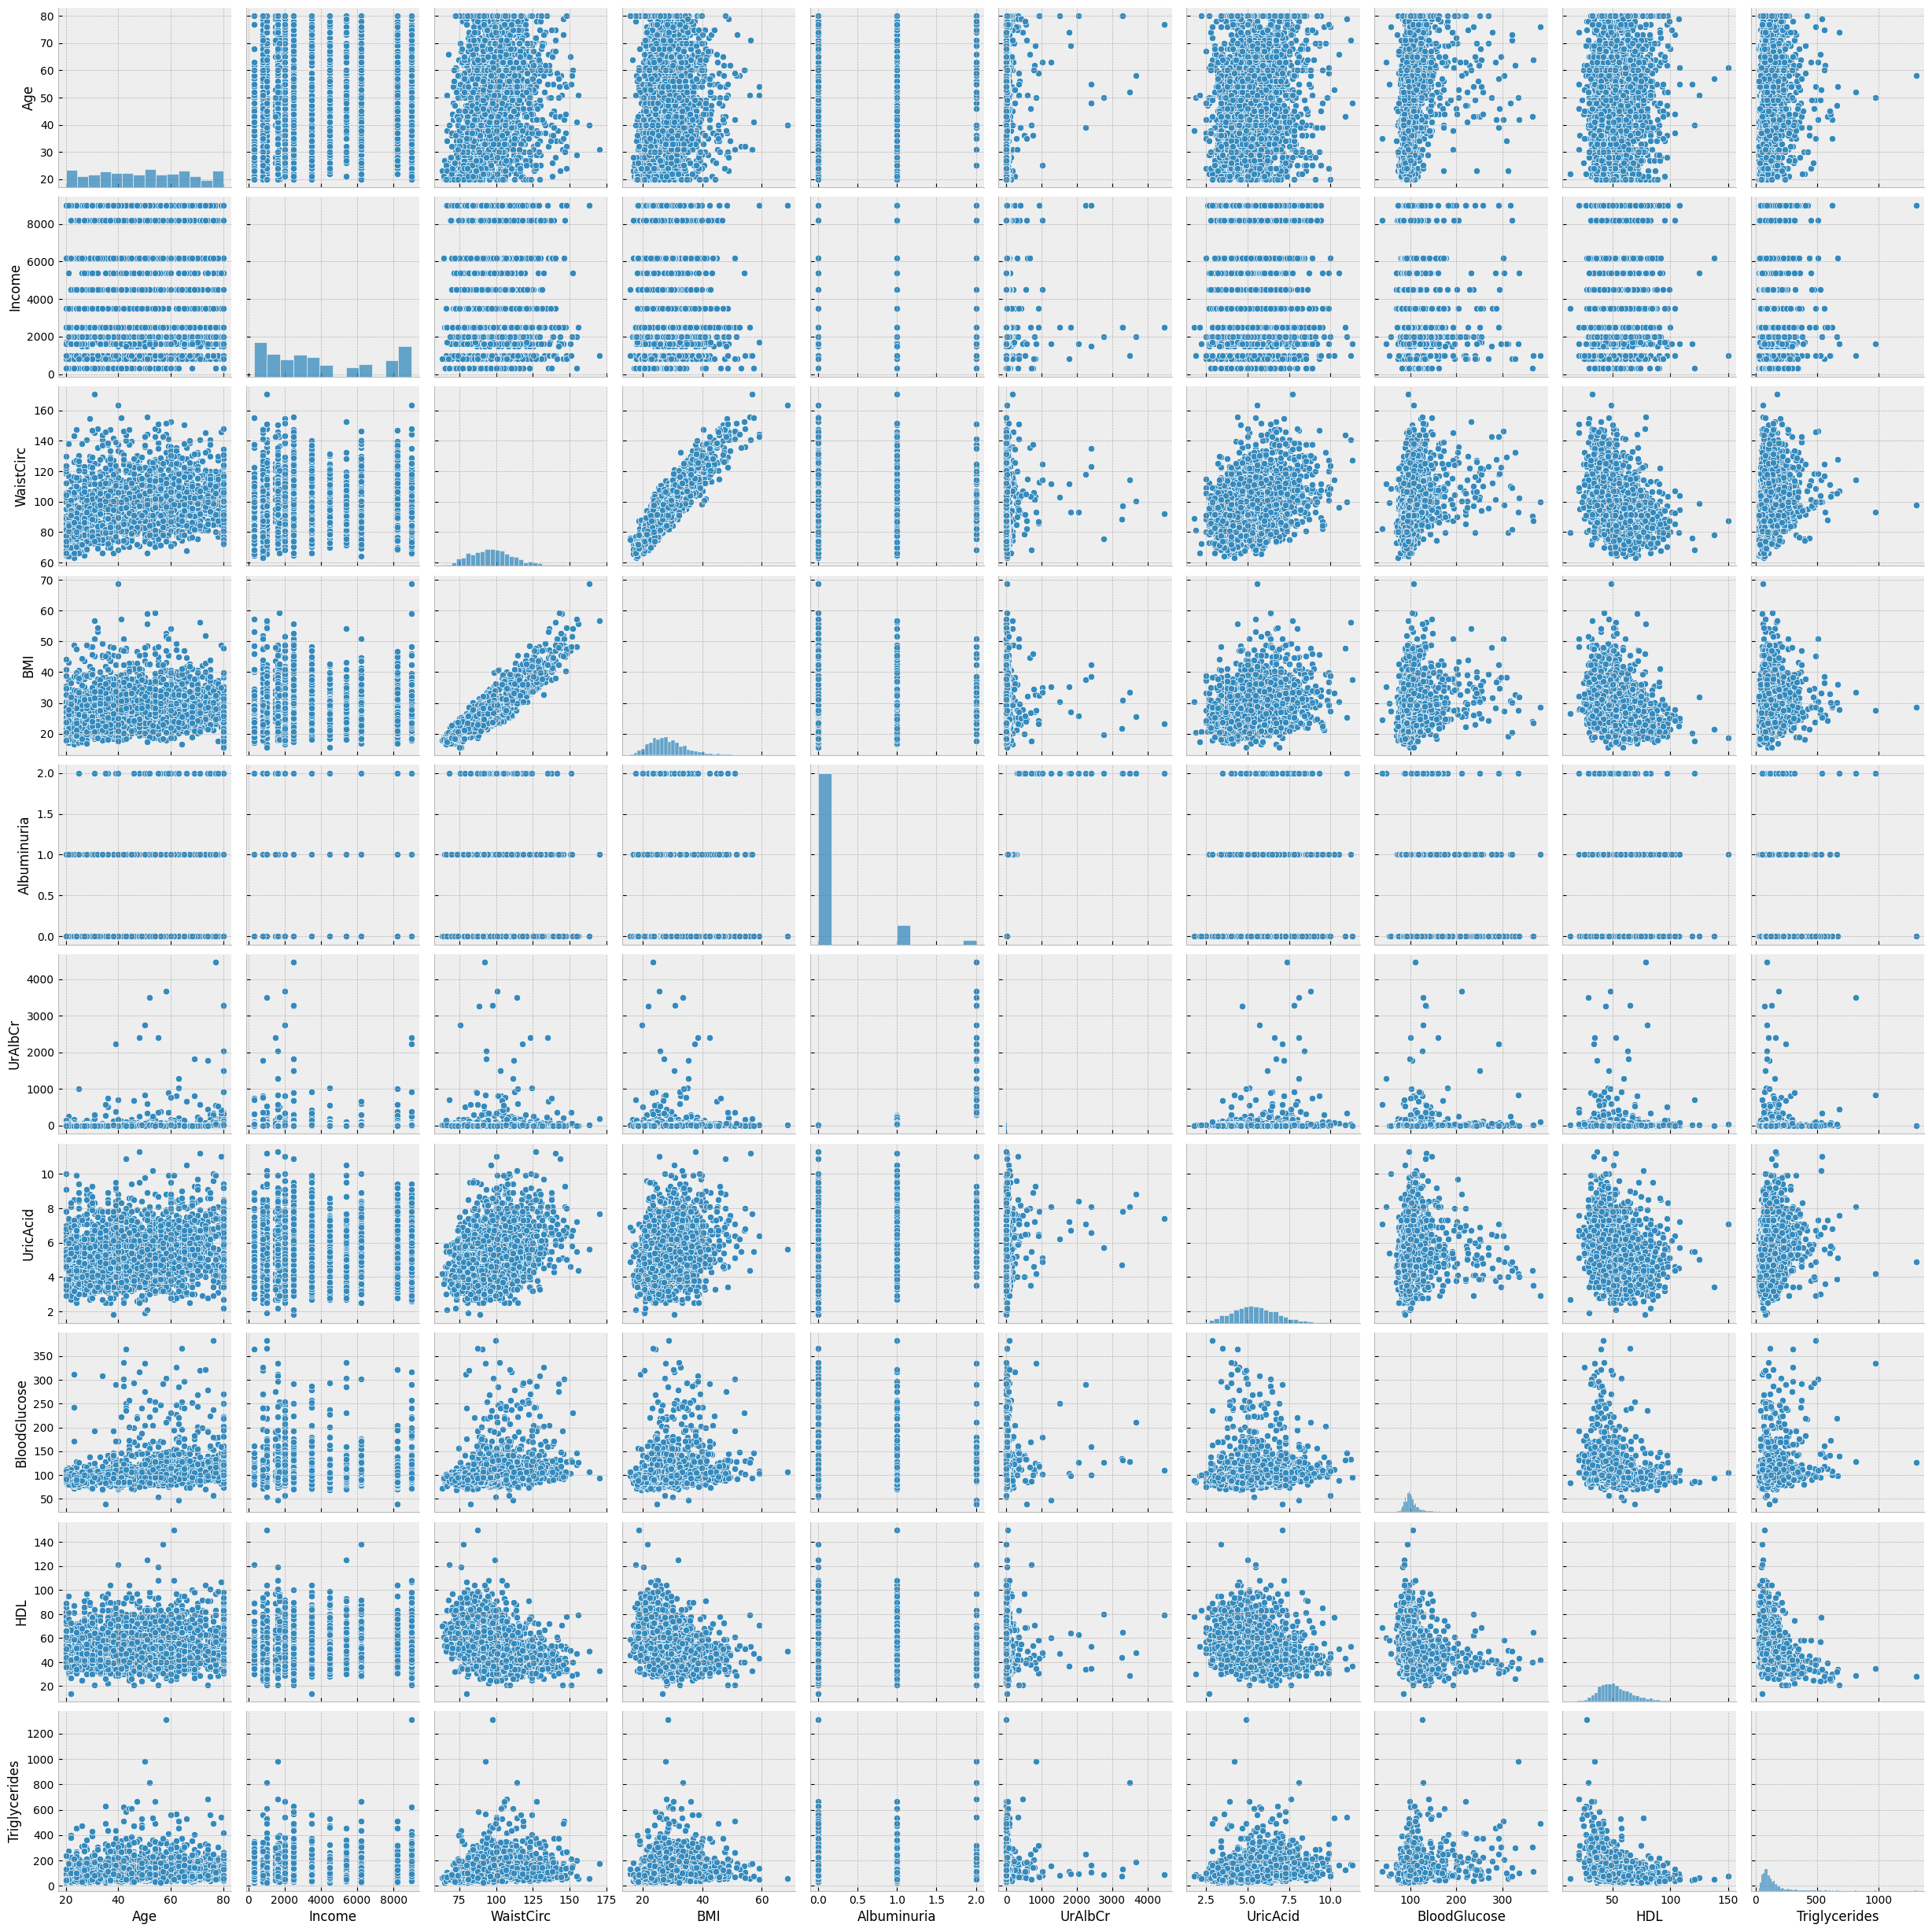

In [210]:
sns.pairplot(df[var_num],palette='plasma')
plt.show()

### Análisis Multivariado

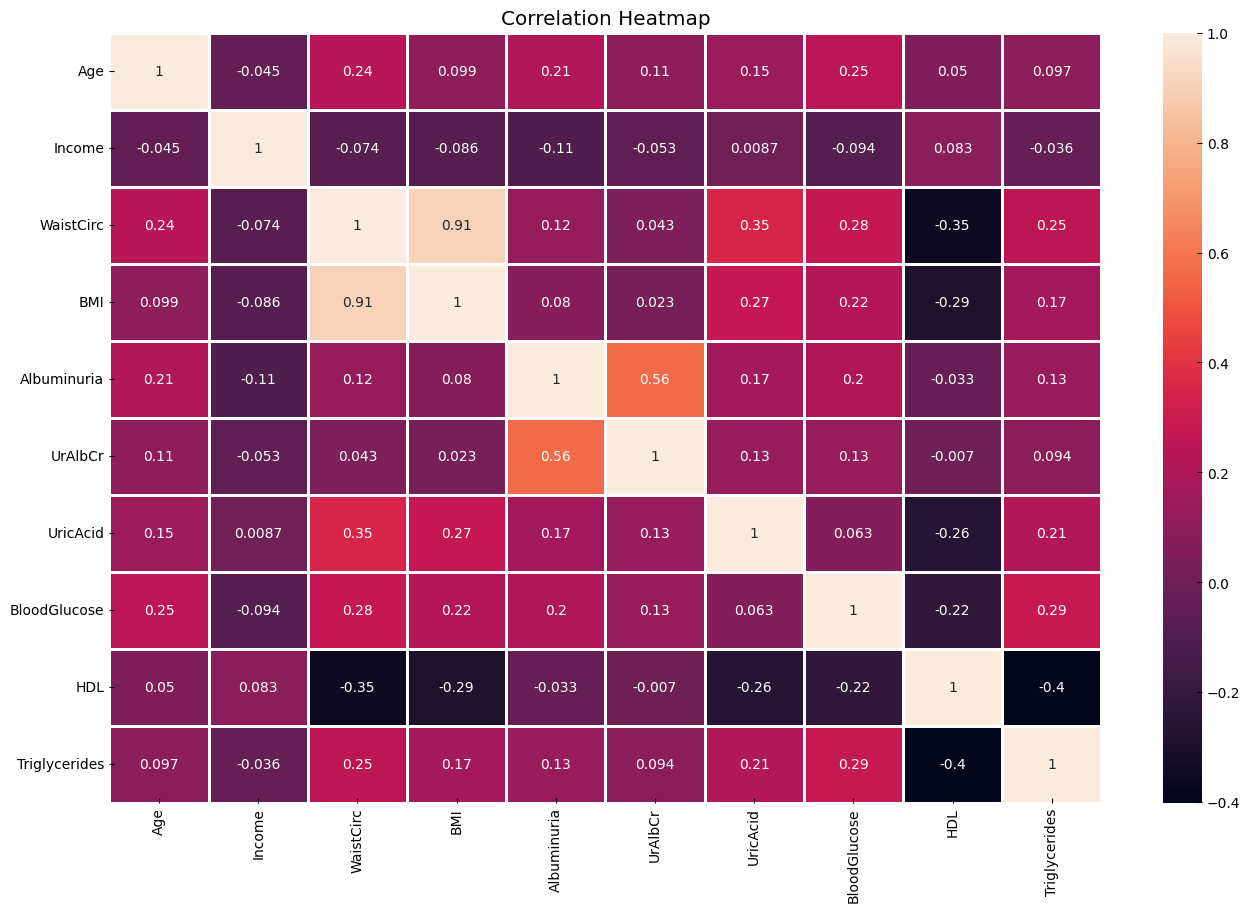

In [211]:
df_ = df.drop(["seqn"],axis=1)
plt.figure(figsize= (16,10))
sns.heatmap(df_.corr(),annot=True,lw=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [212]:
#Correlacion con un valor mayor a 0.7
df_corr =df_.corr()
for c in df_corr.columns:
    for i in df_corr.index:
        if df_corr.loc[i,c] >0.7 and c!=i:
            print(c,i,df_corr.loc[i,c])
        

WaistCirc BMI 0.9094671735844513
BMI WaistCirc 0.9094671735844513


**Edad distribuida por Sexo y Sindrome Metabolico**

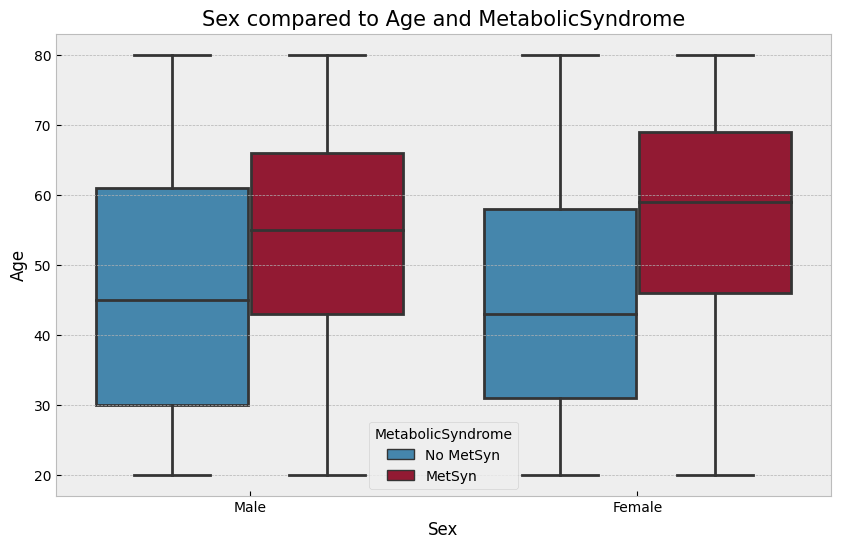

In [213]:
plt.figure(figsize=(10,6)) 
plt.title('Sex compared to Age and MetabolicSyndrome', fontsize = 15, fontweight = 30)
sns.boxplot(data=df,x='Sex',y='Age',hue='MetabolicSyndrome')
plt.show()

**Edad distribuida por Raza y Sindrome Metabolico**

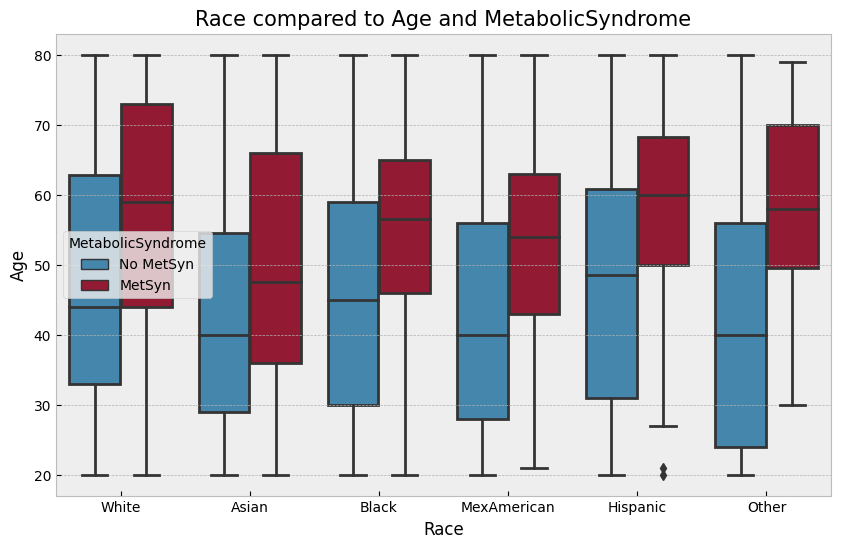

In [214]:
plt.figure(figsize=(10,6)) 
plt.title('Race compared to Age and MetabolicSyndrome', fontsize = 15, fontweight = 30)
sns.boxplot(data=df,x='Race',y='Age',hue='MetabolicSyndrome')
plt.show()

## Sección 5 - Aplicación de filtros para el dataset final

### *Variables independientes numéricas*
- Age
- Income
- WaistCirc
- BMI
- Albuminuria
- UrAlbCr
- UricAcid
- BloodGlucose
- HDL
- Triglycerides

### *Varibles independientes categóricas*
- Sex
- Marital
- Race

Para modelar el data set final, debemos dejar las variables independientes y eliminar la variable dependiente (considerar tambien eliminar la variable **seqn** ya que solo hace referencia al ID del registro)

In [215]:
df_1 = df.drop(["seqn","MetabolicSyndrome"], axis=1)
df.head()

seqn  Age     Sex  Marital  Income   Race  WaistCirc   BMI  Albuminuria  \
0  62161   22    Male   Single  8200.0  White       81.0  23.3            0   
1  62164   44  Female  Married  4500.0  White       80.1  23.2            0   
2  62169   21    Male   Single   800.0  Asian       69.6  20.1            0   
3  62172   43  Female   Single  2000.0  Black      120.4  33.3            0   
5  62178   80    Male  Widowed   300.0  White      112.5  28.5            0   

   UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides MetabolicSyndrome  
0     3.88       4.9            92   41             84         No MetSyn  
1     8.55       4.5            82   28             56         No MetSyn  
2     5.07       5.4           107   43             78         No MetSyn  
3     5.22       5.0           104   73            141         No MetSyn  
5     9.79       4.8           105   47            100         No MetSyn

In [216]:
print("Columnas: ",df_1.shape[1])

Columnas:  13


Para el tratamiento de variables categóricas aplicaremos **one hot encoding** debido a que la cantidad máxima de valores es **6** de la variable **Race**

In [217]:
df_f = pd.get_dummies(df_1)
df_f.head()

Age  Income  WaistCirc   BMI  Albuminuria  UrAlbCr  UricAcid  BloodGlucose  \
0   22  8200.0       81.0  23.3            0     3.88       4.9            92   
1   44  4500.0       80.1  23.2            0     8.55       4.5            82   
2   21   800.0       69.6  20.1            0     5.07       5.4           107   
3   43  2000.0      120.4  33.3            0     5.22       5.0           104   
5   80   300.0      112.5  28.5            0     9.79       4.8           105   

   HDL  Triglycerides  ...  Marital_Married  Marital_Separated  \
0   41             84  ...                0                  0   
1   28             56  ...                1                  0   
2   43             78  ...                0                  0   
3   73            141  ...                0                  0   
5   47            100  ...                0                  0   

   Marital_Single  Marital_Widowed  Race_Asian  Race_Black  Race_Hispanic  \
0               1                0           0           0              0   
1               0                0           0           0              0   
2               1                0           1           0              0   
3               1                0           0           1              0   
5               0                1           0           0              0   

   Race_MexAmerican  Race_Other  Race_White  
0                 0           0           1  
1                 0           0           1  
2                 0           0           0  
3                 0           0           0  
5                 0           0           1  

[5 rows x 23 columns]

In [218]:
print("Columnas con dummies: ",df_f.shape[1])

Columnas con dummies:  23


Se observa que han aumentado 10 columnas más debido a la aplicación de One Hot Encoding

## Sección 6 - Aplicacion de Modelos de ML

### *Separación data de entrenamiento y prueba*

In [219]:
#Variables dependientes
X = df_f
y = df.MetabolicSyndrome
y.replace({"No MetSyn":0,"MetSyn":1}, inplace=True)
y

0       0
1       0
2       0
3       0
5       0
       ..
2394    0
2395    1
2398    0
2399    1
2400    1
Name: MetabolicSyndrome, Length: 2009, dtype: int64

In [220]:
#Separamos 30% para test y 70% para train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

### *Decision Tree*
Presenta los parámetros:
- **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”
- **splitter**: {“best”, “random”}, default=”best”
- **max_depth**: int, default=None
- **min_samples_split**: int or float, default=2
- **min_samples_leaf**: int or float, default=1
- **min_weight_fraction_leaf**: float, default=0.0
- **max_features**: int, float or {“auto”, “sqrt”, “log2”}, default=None
- **random_state**: int, RandomState instance or None, default=None
- **max_leaf_nodes**: int, default=None
- **min_impurity_decrease**: float, default=0.0
- **class_weight**: dict, list of dict or “balanced”, default=None
- **ccp_alpha**: non-negative float, default=0.0

In [221]:
#Importar librería
from sklearn.tree import DecisionTreeClassifier

#Instanciar
tree = DecisionTreeClassifier(random_state=1)

tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [222]:
#Entrenamiento
tree.fit(X_train,y_train)

#Predicción de la prueba
y_pred = tree.predict(X_test)

**Análisis del árbol con Accuracy**

In [223]:
from sklearn.metrics import accuracy_score

print("Exactitud {:.3f}%".format(accuracy_score(y_test,y_pred)*100))

Exactitud 84.743%


**Matriz de confusión**

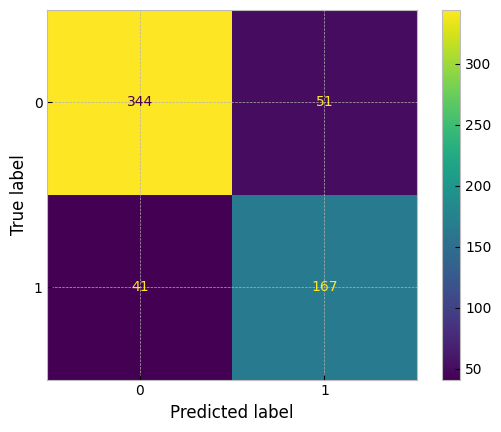

In [224]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(tree,X_test,y_test)

**Reporte de Clasificación**

In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       395
           1       0.77      0.80      0.78       208

    accuracy                           0.85       603
   macro avg       0.83      0.84      0.83       603
weighted avg       0.85      0.85      0.85       603



El modelo presenta una Exactitud de **84.743%**. Vamos a evaluar modificando algunos hiperparámetros para ver si las métricas mejoran

**Randomized Search**

In [226]:
#Elección de parámetros más significativos
parametros_tree ={'criterion': ['gini','entropy'],
             'max_depth': [1,3,6,9],
             'max_features': [0.25,0.5,0.75,1]
            }

In [227]:
from sklearn.model_selection import RandomizedSearchCV

#Instanciar
randomized_tree = RandomizedSearchCV(tree,parametros_tree,scoring='accuracy',cv=3 )

#Entrenamiento
randomized_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 3, 6, 9],
                                        'max_features': [0.25, 0.5, 0.75, 1]},
                   scoring='accuracy')

In [228]:
#Parámetros que consideró al momento de entrenar
randomized_tree.cv_results_['params']

[{'max_features': 0.25, 'max_depth': 9, 'criterion': 'entropy'},
 {'max_features': 0.75, 'max_depth': 1, 'criterion': 'entropy'},
 {'max_features': 0.75, 'max_depth': 3, 'criterion': 'gini'},
 {'max_features': 0.5, 'max_depth': 1, 'criterion': 'gini'},
 {'max_features': 0.75, 'max_depth': 6, 'criterion': 'gini'},
 {'max_features': 0.75, 'max_depth': 6, 'criterion': 'entropy'},
 {'max_features': 0.5, 'max_depth': 1, 'criterion': 'entropy'},
 {'max_features': 1, 'max_depth': 6, 'criterion': 'gini'},
 {'max_features': 0.25, 'max_depth': 6, 'criterion': 'gini'},
 {'max_features': 0.5, 'max_depth': 9, 'criterion': 'gini'}]

In [229]:
#Mejores Parámetros
randomized_tree.best_params_

{'max_features': 0.75, 'max_depth': 6, 'criterion': 'gini'}

In [230]:
#Mejor Score
randomized_tree.best_score_

0.8556363481736616

 ---Hiperparámetros por defecto---  
{'criterion': 'gini',  
 'max_depth': None,  
 'max_features': None,}  
 **Accuracy: 84.74%**

---Hiperparámetros después de Randomized Search---  
{'max_features': <span style="color:blue">0.75</span>,  
'max_depth': <span style="color:blue">6</span>,  
'criterion': 'gini'}  
**Accuracy:** <span style="color:green;font-weight:bold;">85.71%</span> 


Se observa que Accuracy aumentó de 84.74% a 85.71% lo que significa que con un adecuado valor de hiperparámetros se mejora las métricas

**Evaluación del modelo con los nuevos hiperparámetros**

In [231]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
tree_1 = DecisionTreeClassifier(random_state=1,max_features=0.75,max_depth=6)

#Entrenamiento
tree_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features=0.75, random_state=1)

In [232]:
y_pred_1 = tree_1.predict(X_test)

In [233]:
#Metricas con los nuevos hiperparámetros
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       395
           1       0.75      0.84      0.79       208

    accuracy                           0.85       603
   macro avg       0.83      0.84      0.84       603
weighted avg       0.85      0.85      0.85       603



**Curva ROC**

In [234]:
from sklearn.metrics import roc_curve,roc_auc_score

y_score1 = tree.predict_proba(X_test)[:,1]

y_score1

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1.

In [235]:
false_positive_rate1, true_positive_rate1,threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTreeClassifier: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTreeClassifier:  0.8368853456669912


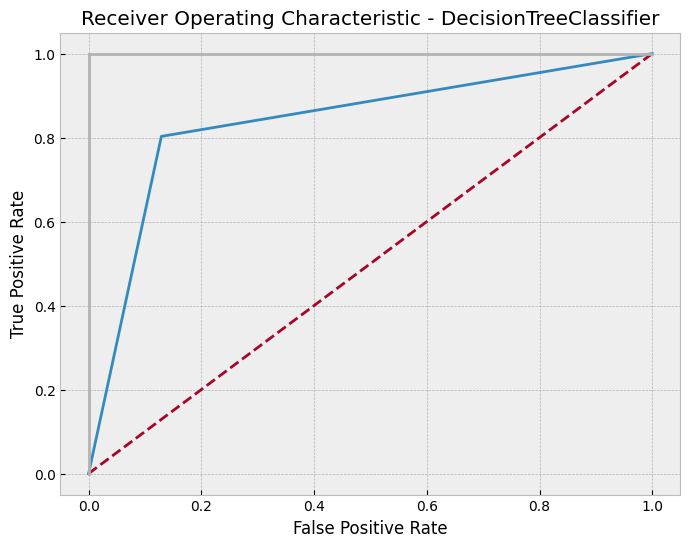

In [236]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTreeClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### *Random Forest*
Presenta los parámetros:
- **n_estimators**:int, default=100
- **criterion**:{“gini”, “entropy”, “log_loss”}, default=”gini”
- **max_depth**:int, default=None
- **min_samples_split**:int or float, default=2
- **min_samples_leaf**:int or float, default=1
- **min_weight_fraction_leaf**:float, default=0.0
- **max_features**:{“sqrt”, “log2”, None}, int or float, default=”sqrt”
- **max_leaf_nodes**:int, default=None
- **min_impurity_decrease**:float, default=0.0
- **bootstrap**:bool, default=True
- **oob_score**:bool, default=False
- **n_jobs**:int, default=None
- **random_state**:int, RandomState instance or None, default=None
- **verbose**:int, default=0
- **warm_start**:bool, default=False
- **class_weight**:{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
- **ccp_alpha**:non-negative float, default=0.0
- **max_samples**:int or float, default=None


In [237]:
#Importar librería
from sklearn.ensemble import RandomForestClassifier

#Instanciar
rfc = RandomForestClassifier(random_state=1)

rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [238]:
#Entrenamiento
rfc.fit(X_train,y_train)

#Predicción de la prueba
y_pred = rfc.predict(X_test)

**Análisis del bosque con Accuracy**

In [239]:
from sklearn.metrics import accuracy_score

print("Exactitud {:.3f}%".format(accuracy_score(y_test,y_pred)*100))

Exactitud 88.723%


**Matriz de confusión**

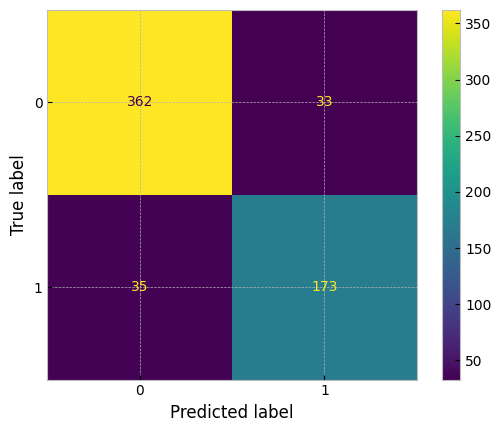

In [240]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test)

**Reporte de Clasificación**

In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       395
           1       0.84      0.83      0.84       208

    accuracy                           0.89       603
   macro avg       0.88      0.87      0.87       603
weighted avg       0.89      0.89      0.89       603



El modelo presenta una Exactitud de **88.723%**. Vamos a evaluar modificando algunos hiperparámetros para ver si las métricas mejoran

**Randomized Search**

In [242]:
#Elección de parámetros más significativos
parametros_rfc ={'n_estimators': [50,100,200,300],
             'max_depth': [1,3,6,9],
             'max_features': [0.25,0.5,0.75,1],
             'bootstrap': [True,False],
             'min_samples_split':[2, 5, 10, 20, 50 , 100],
             'min_samples_leaf': [1,5,10,20]
            }

In [243]:
from sklearn.model_selection import RandomizedSearchCV

#Instanciar
randomized_rfc = RandomizedSearchCV(rfc,parametros_rfc,scoring='accuracy',cv=3)

#Entrenamiento
randomized_rfc.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 6, 9],
                                        'max_features': [0.25, 0.5, 0.75, 1],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20, 50,
                                                              100],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='accuracy')

In [244]:
#Parámetros que consideró al momento de entrenar
randomized_rfc.cv_results_['params']

[{'n_estimators': 200,
  'min_samples_split': 50,
  'min_samples_leaf': 10,
  'max_features': 0.75,
  'max_depth': 3,
  'bootstrap': False},
 {'n_estimators': 50,
  'min_samples_split': 20,
  'min_samples_leaf': 10,
  'max_features': 1,
  'max_depth': 1,
  'bootstrap': False},
 {'n_estimators': 300,
  'min_samples_split': 10,
  'min_samples_leaf': 10,
  'max_features': 0.5,
  'max_depth': 1,
  'bootstrap': True},
 {'n_estimators': 200,
  'min_samples_split': 100,
  'min_samples_leaf': 5,
  'max_features': 0.5,
  'max_depth': 9,
  'bootstrap': False},
 {'n_estimators': 100,
  'min_samples_split': 50,
  'min_samples_leaf': 10,
  'max_features': 0.25,
  'max_depth': 1,
  'bootstrap': True},
 {'n_estimators': 100,
  'min_samples_split': 20,
  'min_samples_leaf': 20,
  'max_features': 0.5,
  'max_depth': 9,
  'bootstrap': True},
 {'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 5,
  'max_features': 0.25,
  'max_depth': 6,
  'bootstrap': True},
 {'n_estimators': 300,
  '

In [245]:
#Mejores Parámetros
randomized_rfc.best_params_

{'n_estimators': 100,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 0.75,
 'max_depth': 9,
 'bootstrap': False}

In [246]:
#Mejor Score
randomized_rfc.best_score_

0.8684325624624133

---Hiperparámetros por defecto---  
{'bootstrap': True,  
 'max_depth': None,  
 'max_features': 'auto',  
 'min_samples_leaf': 1,  
 'min_samples_split': 2,  
 'n_estimators': 100,}  
 **Accuracy: 88.723%**  

 ---Hiperparámetros después de Randomized Search---  
{'n_estimators': 100,  
 'min_samples_split': <span style="color:blue">10</span>,  
 'min_samples_leaf': <span style="color:blue">5</span>,  
 'max_features': <span style="color:blue">0.5</span>,  
 'max_depth': <span style="color:blue">9</span>,  
 'bootstrap': True}  
**Accuracy:** <span style="color:red;font-weight:bold;">87.34%</span> 

Se observa que Accuracy disminuyó de 88.72% a 87.34% lo que significa que con los valores por defecto presenta una mejor métrica

**Curva ROC**

In [247]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = rfc.predict_proba(X_test)[:,1]

y_score1

array([0.76, 0.52, 0.01, 0.65, 0.33, 0.27, 0.06, 0.02, 0.  , 0.85, 0.71,
       0.17, 0.03, 0.63, 0.52, 0.68, 0.  , 0.04, 0.31, 0.11, 0.5 , 0.01,
       0.08, 0.66, 0.  , 0.03, 0.73, 0.35, 0.26, 0.2 , 0.13, 0.67, 0.  ,
       0.04, 0.6 , 0.04, 0.5 , 0.28, 0.3 , 0.94, 0.98, 0.33, 0.86, 0.15,
       0.  , 0.05, 0.52, 0.02, 0.69, 0.01, 0.16, 0.92, 0.  , 0.42, 0.01,
       0.25, 0.  , 0.57, 0.3 , 0.54, 0.68, 0.99, 0.26, 0.35, 0.  , 0.98,
       0.89, 0.  , 0.1 , 0.75, 0.2 , 0.21, 0.33, 0.1 , 0.88, 0.17, 0.78,
       0.75, 0.13, 0.99, 0.34, 0.  , 0.86, 0.06, 0.9 , 0.94, 0.62, 0.01,
       0.96, 0.71, 0.03, 0.03, 0.12, 0.16, 0.64, 0.1 , 0.68, 0.95, 0.76,
       0.49, 0.11, 0.37, 0.36, 0.48, 0.47, 0.93, 0.78, 0.01, 0.83, 0.93,
       0.02, 0.13, 0.64, 0.14, 0.16, 0.02, 0.  , 0.41, 0.05, 0.09, 0.93,
       0.3 , 0.63, 0.85, 0.87, 0.68, 0.34, 0.31, 0.  , 0.91, 0.28, 0.07,
       0.89, 0.99, 0.  , 0.  , 0.2 , 0.95, 0.  , 0.05, 0.88, 0.56, 0.9 ,
       0.01, 0.04, 0.18, 0.03, 0.8 , 0.01, 0.59, 0.

In [248]:
false_positive_rate1, true_positive_rate1,threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for RandomForestClassifier: ', roc_auc_score(y_test, y_score1))

roc_auc_score for RandomForestClassifier:  0.9549050632911392


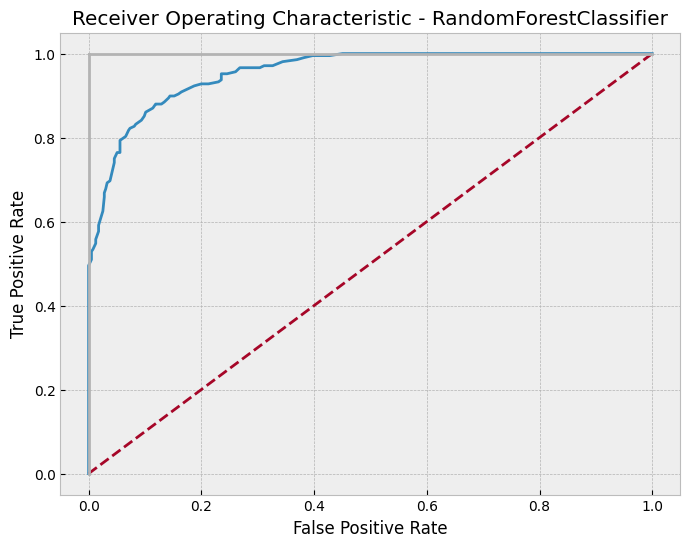

In [249]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### *KNeighbors*
Presenta los parámetros:
- **n_neighbors**:int, default=5
- **weights**:{‘uniform’, ‘distance’}, callable or None, default=’uniform’
- **algorithm**:{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
- **leaf_size**:int, default=30
- **p**: int, default=2
- **metric**:str or callable, default=’minkowski’
- **metric_params**:dict, default=None
- **n_jobs**:int, default=None



In [250]:
#Importar librería
from sklearn.neighbors import KNeighborsClassifier

#Instanciar
knn = KNeighborsClassifier()

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [251]:
#Entrenamiento
knn.fit(X_train,y_train)

#Predicción de la prueba
y_pred = knn.predict(X_test)

**Análisis del árbol con Accuracy**

In [252]:
from sklearn.metrics import accuracy_score

print("Exactitud {:.3f}%".format(accuracy_score(y_test,y_pred)*100))

Exactitud 78.773%


**Matriz de confusión**

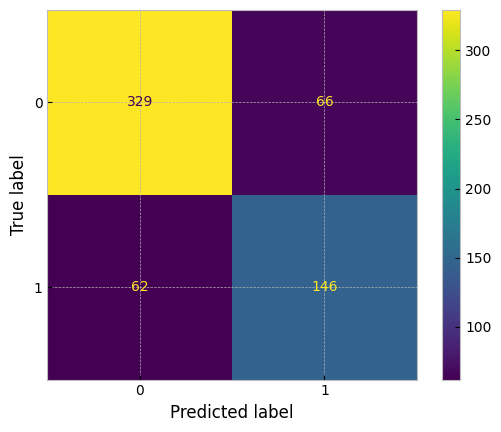

In [253]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test)

**Reporte de Clasificación**

In [254]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       395
           1       0.69      0.70      0.70       208

    accuracy                           0.79       603
   macro avg       0.77      0.77      0.77       603
weighted avg       0.79      0.79      0.79       603



El modelo presenta una Exactitud de **78.77%**. Vamos a evaluar modificando algunos hiperparámetros para ver si las métricas mejoran

**Randomized Search**

In [255]:
#Elección de parámetros más significativos
parametros_knn ={'weights': ['uniform','distance'],
             'n_neighbors': [3,6,9],
             'p': [1,2],
             'algorithm': ['brute','kd_tree','ball_tree']
            }

In [256]:
from sklearn.model_selection import RandomizedSearchCV

#Instanciar
randomized_knn= RandomizedSearchCV(knn,parametros_knn,scoring='accuracy',cv=3 )

#Entrenamiento
randomized_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['brute', 'kd_tree',
                                                      'ball_tree'],
                                        'n_neighbors': [3, 6, 9], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [257]:
#Parámetros que consideró al momento de entrenar
randomized_knn.cv_results_['params']

[{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'algorithm': 'kd_tree'},
 {'weights': 'uniform', 'p': 2, 'n_neighbors': 6, 'algorithm': 'brute'},
 {'weights': 'distance', 'p': 2, 'n_neighbors': 6, 'algorithm': 'kd_tree'},
 {'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'algorithm': 'brute'},
 {'weights': 'uniform', 'p': 2, 'n_neighbors': 3, 'algorithm': 'brute'},
 {'weights': 'uniform', 'p': 2, 'n_neighbors': 3, 'algorithm': 'ball_tree'},
 {'weights': 'uniform', 'p': 1, 'n_neighbors': 9, 'algorithm': 'ball_tree'},
 {'weights': 'uniform', 'p': 1, 'n_neighbors': 6, 'algorithm': 'ball_tree'},
 {'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'algorithm': 'kd_tree'},
 {'weights': 'uniform', 'p': 1, 'n_neighbors': 6, 'algorithm': 'kd_tree'}]

In [258]:
#Mejores Parámetros
randomized_knn.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'algorithm': 'kd_tree'}

In [259]:
#Mejor Score
randomized_knn.best_score_

0.817931101513191

---Hiperparámetros por defecto---  
{'algorithm': 'auto',  
 'n_neighbors': 5,  
 'p': 2,  
 'weights': 'uniform'}  
Accuracy: 78.77%  

---Hiperparámetros después de Randomized Search---  
{'weights': <span style="color:blue">'distance'</span>,   
'p': <span style="color:blue">1</span>,  
'n_neighbors': <span style="color:blue">9</span>,   
'algorithm': <span style="color:blue">'kd_tree'</span>}  
**Accuracy:** <span style="color:green;font-weight:bold;">81.79%</span>

Se observa que Accuracy aumentó de 78.77% a 81.79% lo que significa que con un adecuado valor de hiperparámetros se mejora las métricas

**Evaluación del nuvo con los nuevos hiperparámetros**

In [260]:
from sklearn.neighbors import KNeighborsClassifier

#Instanciar
knn_1 = KNeighborsClassifier(weights='distance',p=1,n_neighbors=9,algorithm='kd_tree')

#Entrenamiento
knn_1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9, p=1,
                     weights='distance')

In [261]:
y_pred_1 = knn_1.predict(X_test)

In [262]:
#Metricas con los nuevos hiperparámetros
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       395
           1       0.73      0.69      0.71       208

    accuracy                           0.81       603
   macro avg       0.79      0.78      0.78       603
weighted avg       0.81      0.81      0.81       603



**Curva ROC**

In [263]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = knn.predict_proba(X_test)[:,1]

y_score1

array([0.8, 0.4, 0. , 0.6, 0.2, 0.4, 0.2, 0. , 0. , 0.6, 0.8, 0. , 0. ,
       0.4, 0. , 0.6, 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0. , 0.4, 0. , 0. ,
       0.8, 0.6, 0.8, 0.6, 0.2, 0.4, 0. , 0. , 0.8, 0. , 0.8, 0.4, 0.4,
       0.4, 0.6, 0.8, 0.8, 0. , 0. , 0.4, 0.6, 0. , 0.8, 0. , 0.8, 0.6,
       0. , 1. , 0. , 0.8, 0. , 0.2, 0. , 0.8, 0. , 1. , 0.2, 0.4, 0. ,
       1. , 0.8, 0. , 0. , 0.6, 0.4, 0.6, 0.8, 0.4, 0.8, 0.4, 0.6, 0.2,
       0.4, 0.6, 0.6, 0. , 0.6, 0. , 1. , 1. , 0.6, 0. , 1. , 1. , 0. ,
       0. , 0.2, 0. , 0.8, 0.2, 0.2, 0.8, 0.4, 0.4, 0.6, 0.6, 0.8, 0.4,
       0.8, 0.6, 0.6, 0.2, 0.4, 0.8, 0. , 0.4, 0.6, 0.2, 0.2, 0. , 0. ,
       0.4, 0. , 0.4, 0.6, 0.2, 0.4, 0.8, 1. , 0.2, 0.2, 0. , 0. , 1. ,
       0.4, 0.2, 1. , 1. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0.4, 0.6, 1. ,
       0. , 0. , 0.4, 0.2, 0.6, 0. , 0.6, 0.6, 0. , 0.6, 0.8, 0.8, 0.2,
       0.2, 0. , 0.8, 0. , 0.8, 0. , 0.2, 0. , 0.6, 0.2, 0.2, 0.6, 0. ,
       1. , 0. , 1. , 0.4, 0. , 0.8, 0.4, 0. , 0. , 0. , 0.4, 0.

In [264]:
false_positive_rate1, true_positive_rate1,threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for KNeighborsClassifier: ', roc_auc_score(y_test, y_score1))

roc_auc_score for KNeighborsClassifier:  0.8426484907497566


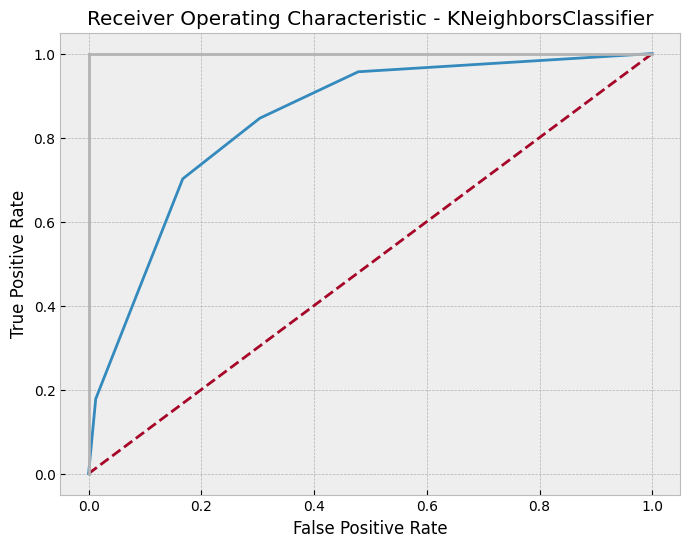

In [265]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - KNeighborsClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### *XGBOOST*

In [266]:
#Importar librería
import xgboost

#Instanciar
xgb = xgboost.XGBClassifier()

xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [267]:
#Entrenamiento
xgb.fit(X_train,y_train)

#Predicción de la prueba
y_pred = xgb.predict(X_test)

**Análisis del bosque con Accuracy**

In [268]:
from sklearn.metrics import accuracy_score

print("Exactitud {:.3f}%".format(accuracy_score(y_test,y_pred)*100))

Exactitud 88.889%


**Matriz de confusión**

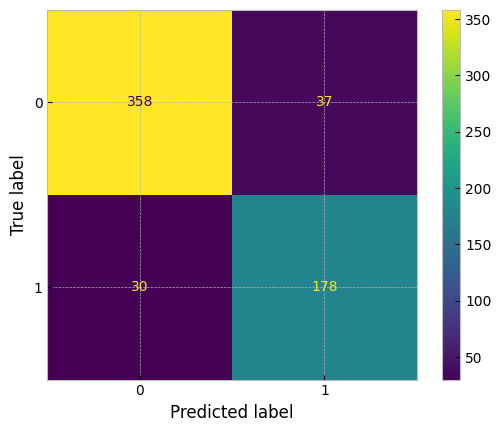

In [269]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb,X_test,y_test)

**Reporte de Clasificación**

In [270]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       395
           1       0.83      0.86      0.84       208

    accuracy                           0.89       603
   macro avg       0.88      0.88      0.88       603
weighted avg       0.89      0.89      0.89       603



El modelo presenta una Exactitud de 88.89%. Vamos a evaluar modificando algunos hiperparámetros para ver si las métricas mejoran

**Randomized Search**

In [271]:
#Elección de parámetros más significativos
parametros_xgb ={'n_estimators': [50,100,200,300,500],
             'max_depth': [3,6,9],
             'learning_rate': [0.01,0.05,0.1,0.2,0.3],
             'subsample': [0.5,0.75,1],
             'colsample_bytree':[0.5,0.75,1]
            }

In [272]:
from sklearn.model_selection import RandomizedSearchCV

#Instanciar
randomized_xgb = RandomizedSearchCV(xgb,parametros_xgb,scoring='accuracy',cv=3)

#Entrenamiento
randomized_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                   

In [273]:
#Parámetros que consideró al momento de entrenar
randomized_xgb.cv_results_['params']

[{'subsample': 1,
  'n_estimators': 300,
  'max_depth': 6,
  'learning_rate': 0.2,
  'colsample_bytree': 0.75},
 {'subsample': 1,
  'n_estimators': 200,
  'max_depth': 9,
  'learning_rate': 0.2,
  'colsample_bytree': 1},
 {'subsample': 0.75,
  'n_estimators': 100,
  'max_depth': 3,
  'learning_rate': 0.2,
  'colsample_bytree': 1},
 {'subsample': 0.5,
  'n_estimators': 500,
  'max_depth': 9,
  'learning_rate': 0.1,
  'colsample_bytree': 0.5},
 {'subsample': 0.5,
  'n_estimators': 300,
  'max_depth': 3,
  'learning_rate': 0.3,
  'colsample_bytree': 0.75},
 {'subsample': 0.75,
  'n_estimators': 50,
  'max_depth': 3,
  'learning_rate': 0.01,
  'colsample_bytree': 0.75},
 {'subsample': 0.75,
  'n_estimators': 300,
  'max_depth': 3,
  'learning_rate': 0.2,
  'colsample_bytree': 0.5},
 {'subsample': 0.5,
  'n_estimators': 200,
  'max_depth': 3,
  'learning_rate': 0.01,
  'colsample_bytree': 0.5},
 {'subsample': 0.75,
  'n_estimators': 50,
  'max_depth': 9,
  'learning_rate': 0.3,
  'colsample

In [274]:
#Mejores Parámetros
randomized_xgb.best_params_

{'subsample': 0.75,
 'n_estimators': 100,
 'max_depth': 3,
 'learning_rate': 0.2,
 'colsample_bytree': 1}

In [275]:
#Mejor Score
randomized_xgb.best_score_

0.8862054197875094

---Hiperparámetros por defecto---  
{'subsample': None,  
 'n_estimators': 100,  
 'max_depth': None,  
 'learning_rate'None: ,  
 'colsample_bytree': None}   
 **Accuracy: 88.89%**  

 ---Hiperparámetros después de Randomized Search---  
{'subsample': <span style="color:blue">0.5</span>,  
 'n_estimators': <span style="color:blue">300</span>,  
 'max_depth': <span style="color:blue">6</span>,  
 'learning_rate': <span style="color:blue">0.05</span>,  
 'colsample_bytree': <span style="color:blue">1</span>}  
**Accuracy:** <span style="color:red;font-weight:bold;">87.84%</span> 

Se observa que Accuracy disminuyó de 88.89% a 87.84% lo que significa que con los valores por defecto presenta una mejor métrica

**Curva ROC**

In [276]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = xgb.predict_proba(X_test)[:,1]

y_score1

array([9.97099400e-01, 9.48814750e-01, 8.84992478e-05, 8.22216272e-01,
       3.30398493e-02, 1.13904104e-02, 3.62044666e-04, 9.10053586e-06,
       1.77044785e-05, 9.97105539e-01, 9.95023847e-01, 7.54676200e-03,
       3.59353471e-05, 9.78114009e-01, 7.10488260e-01, 5.45822918e-01,
       1.40527427e-05, 6.85885389e-05, 7.49823451e-02, 3.07241525e-03,
       5.35346806e-01, 4.90330376e-06, 2.77245743e-03, 9.48224902e-01,
       1.08126815e-05, 8.84013207e-06, 9.90706921e-01, 1.59461349e-02,
       5.79959415e-02, 9.28008407e-02, 1.67264114e-03, 6.88135266e-01,
       8.81895190e-04, 1.12673217e-04, 3.49082828e-01, 1.19304808e-03,
       8.39346111e-01, 1.24293290e-01, 1.32971808e-01, 9.99832988e-01,
       9.99411941e-01, 2.10604161e-01, 9.95576620e-01, 2.43672024e-04,
       7.14002090e-06, 8.48801108e-04, 2.90388525e-01, 2.13775256e-05,
       9.59688365e-01, 6.35674860e-06, 1.99053474e-02, 9.93061006e-01,
       4.46637614e-06, 7.36687541e-01, 7.43973305e-06, 7.08048372e-03,
      

In [277]:
false_positive_rate1, true_positive_rate1,threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for XGBClassifier: ', roc_auc_score(y_test, y_score1))

roc_auc_score for XGBClassifier:  0.9595666991236612


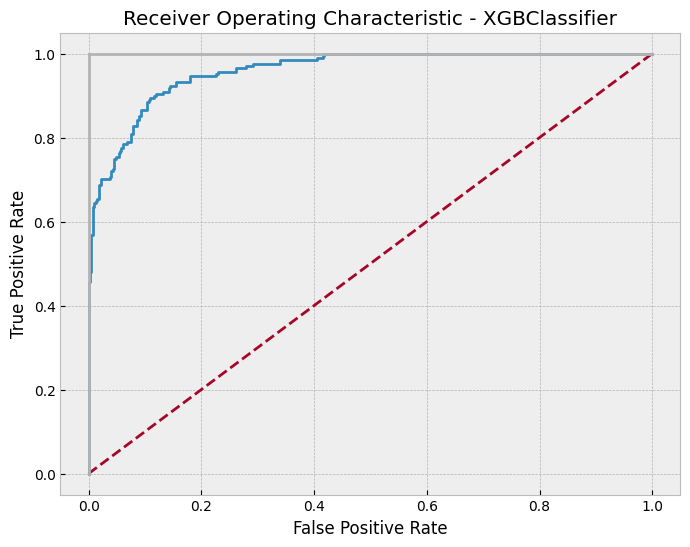

In [278]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - XGBClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Summary

In [279]:
matriz_comparativa = pd.DataFrame(np.nan , columns=["Decision Tree","Random Forest","KNeighbors","XGBOOST"],index=["Accuracy","Precision","Recall","F1_score","ROC_curve"])

matriz_comparativa["Decision Tree"] = np.array([ 0.85, 0.75,0.84,0.79,0.84 ])
matriz_comparativa["Random Forest"] = np.array([ 0.89, 0.84,0.83,0.84,0.95 ])
matriz_comparativa["KNeighbors"] = np.array([ 0.81, 0.73,0.69,0.71,0.84 ])
matriz_comparativa["XGBOOST"] = np.array([ 0.89, 0.83,0.86,0.84,0.96 ])

matriz_comparativa

Decision Tree  Random Forest  KNeighbors  XGBOOST
Accuracy            0.85           0.89        0.81     0.89
Precision           0.75           0.84        0.73     0.83
Recall              0.84           0.83        0.69     0.86
F1_score            0.79           0.84        0.71     0.84
ROC_curve           0.84           0.95        0.84     0.96

### Conclusiones

- Se observa una alta correlación entre el Circunferencia de la cintura del paciente. y el índice de masa corporal, ya que ambas variables se pueden relacionar entre si, alguna de ellas se podria eliminar para ver en cúanto podría variar las métricas del modelo

- Las edades promedio de las varones que poseen Síndrome Metabólico está alrededor delos 55 años, mientras que el de las mujeres ronda los 59 años esto quiere decir que los efectos de ciertas prácticas y alimentación se ven reflejadas a lo largo de los años que pueden desencadenar en este sindrome

- Pese a que existen muchos valores atipicos, se ha demostrado que el algoritmo es capaz de predecir resultado hasta en un 89%

### Recomendaciones
- En general, los modelos de Random Forest y XGBoost parecen ser los más efectivos en la clasificación del síndrome metabólico, con valores altos en todas las métricas evaluadas. Por lo tanto, se recomienda utilizar estos modelos en futuras aplicaciones o investigaciones en el ámbito del síndrome metabólico.

- Aunque todos los modelos tienen una puntuación alta en la precisión, que indica la proporción de predicciones positivas que son realmente positivas, hay una diferencia significativa en la medida Recall, que indica la proporción de casos positivos que son correctamente identificados por el modelo. El modelo KNeighbors tuvo el peor rendimiento en Recall, lo que significa que puede perder algunos casos positivos importantes. En consecuencia, se recomienda tener precaución al utilizar este modelo si el objetivo es identificar todos los casos positivos de síndrome metabólico.

- La medida ROC_curve, que representa la tasa de verdaderos positivos en función de la tasa de falsos positivos para diferentes umbrales de probabilidad de clasificación, sugiere que el modelo XGBoost tiene un rendimiento muy bueno en términos de clasificar correctamente los casos de síndrome metabólico. Por lo tanto, se recomienda utilizar este modelo en situaciones donde es crítico minimizar los falsos positivos.

- Ya que la mayoria de datos son con diagnóstico negativos, aumentar características con resultados positivos aumentará la precision del modelo.

- Dado que el síndrome metabólico es una condición médica importante y con graves consecuencias para la salud, es importante tener en cuenta que cualquier modelo utilizado en la práctica clínica deberá ser validado y evaluado rigurosamente antes de su uso. Además, se recomienda combinar los resultados del modelo con la evaluación médica y otras pruebas diagnósticas para aumentar la precisión y la seguridad del diagnóstico.

- Como se indicó al inicio, se han eliminado datos que poseían campos nulos, sin embargo mediante modelos de clasificación y regresión se pueden completar los campos eliminados para así volver a evaluar el modelo y ver que tan efectivo es el entrenamiento con campos completados